In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
pd.options.display.max_columns = None #显示完整打印数据
pd.options.display.max_rows = None
plt.rcParams['figure.dpi'] = 50 # 调节图片分辨率，dpi
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [12]:
data = pd.read_excel('GZO.xlsx')

In [13]:
data.head()

,BandGap,Transmittance,Resistivity
0,3.150,80.0,0.00280
1,3.240,82.0,0.00130
2,3.270,81.0,0.01200
3,3.356,87.0,0.00353
4,3.347,84.0,0.00351


In [14]:
data.shape

(36, 3)

In [15]:
data.isnull().sum()

BandGap          0
Transmittance    0
Resistivity      0
dtype: int64

In [9]:
# 分离特征和标签
x = data.drop(['BandGap'],axis=1)
y = data['BandGap']

In [16]:
# 数据分割
# 划分训练集，测试集，设置随机种子，保证实验能够复现
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size=0.27,
                                                    random_state=73)

In [18]:
# 评分
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn import metrics
def try_different_method(model):  
    model.fit(x_train,y_train)
    print('训练集集')
    y_predict0 = model.predict(x_train) 
    print('MSE值为:',mean_squared_error(y_train,y_predict0))
    print('MAE值为:',mean_absolute_error(y_train,y_predict0))
    print('RMSE值为:',np.sqrt(metrics.mean_squared_error(y_train, y_predict0)))  
    print('MAPE值为:',np.mean(abs((y_train- y_predict0)/y_test)))
    print('R方值为:', metrics.r2_score(y_train, y_predict0))
    
    
    print('测试集')
    y_predict = model.predict(x_test) 
    print('MSE值为:',mean_squared_error(y_test,y_predict))
    print('MAE值为:',mean_absolute_error(y_test,y_predict))
    print('RMSE值为:',np.sqrt(metrics.mean_squared_error(y_test, y_predict)))  
    print('MAPE值为:',np.mean(abs((y_test- y_predict)/y_test)))
    print('R方值为:', metrics.r2_score(y_test, y_predict))


In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import ensemble
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()

model_RF = ensemble.RandomForestRegressor(random_state=50,
                                          max_depth=5)

model_XGB = xgb.XGBRegressor(random_state=50,
                             learning_rate=0.3,
                            n_estimators=20,
                             max_depth=6)
            
model_LGB = lgb.LGBMRegressor(random_state=50,
                              learning_rate=0.2,
                                n_estimators=20,
                                  max_depth=6)

In [21]:
# 输出评分
print('线性回归评分如下：')
try_different_method(model_LR)
print("----------------------------")
print('随机森林模型评分如下：')
try_different_method(model_RF)
print("----------------------------")
print('XGboost模型评分如下：')
try_different_method(model_XGB)
print("----------------------------")
print('lightgbm模型评分如下：')
try_different_method(model_LGB)

线性回归评分如下：
训练集集
MSE值为: 0.019297626494135404
MAE值为: 0.1126775724481571
RMSE值为: 0.1389158971973165
MAPE值为: nan
R方值为: 0.19038413509120844
测试集
MSE值为: 0.015349689227069526
MAE值为: 0.10626748838364194
RMSE值为: 0.1238938627498131
MAPE值为: 0.030989876469355672
R方值为: 0.3639620115173051
----------------------------
随机森林模型评分如下：
训练集集
MSE值为: 0.0027613306614034513
MAE值为: 0.0371563978937728
RMSE值为: 0.052548364973645484
MAPE值为: nan
R方值为: 0.8841506693887597
测试集
MSE值为: 0.005991455431653665
MAE值为: 0.05801466309523771
RMSE值为: 0.07740449232217511
MAPE值为: 0.017116587600112598
R方值为: 0.7517348263890391
----------------------------
XGboost模型评分如下：
训练集集
MSE值为: 0.0005745452069931153
MAE值为: 0.012780075880197353
RMSE值为: 0.023969672650937794
MAPE值为: nan
R方值为: 0.9758954338332595
测试集
MSE值为: 0.009719977459596496
MAE值为: 0.07667844257354735
RMSE值为: 0.0985899460370909
MAPE值为: 0.022495875301042075
R方值为: 0.5972377798635619
----------------------------
lightgbm模型评分如下：
训练集集
MSE值为: 0.023835534023669027
MAE值为: 0.13647632827984507
R

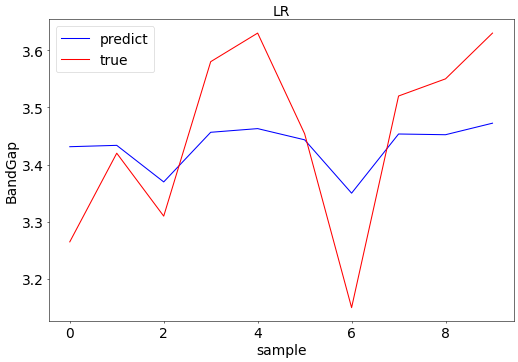

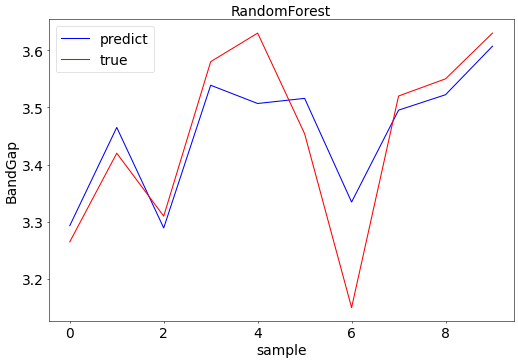

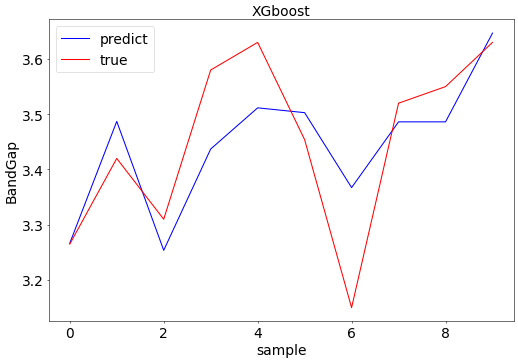

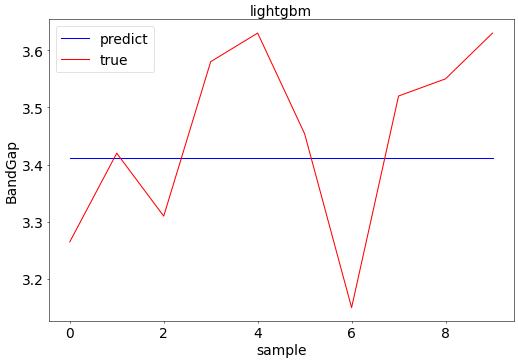

In [11]:
import matplotlib.pyplot as plt
y_test = y_test.reset_index(drop = True)
y_predict1 = model_LR.predict(x_test)
plt.figure(figsize = (12,8))
plt.plot(y_predict1,color = 'b',label = 'predict')
plt.plot(y_test,color = 'r',label = 'true')
plt.xlabel('sample',fontsize=20)
plt.ylabel('BandGap',fontsize=20)
plt.title('LR',fontsize=20)

#字体大小
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

# rf
y_predict2 = model_RF.predict(x_test)
plt.figure(figsize = (12,8))
plt.plot(y_predict2,color = 'b',label = 'predict')
plt.plot(y_test,color = 'r',label = 'true')
plt.xlabel('sample',fontsize=20)
plt.ylabel('BandGap',fontsize=20)
plt.title('RandomForest',fontsize=20)
 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

# XGboost
y_predict5 = model_XGB.predict(x_test)
plt.figure(figsize = (12,8))
plt.plot(y_predict5,color = 'b',label = 'predict')
plt.plot(y_test,color = 'r',label = 'true')
plt.xlabel('sample',fontsize=20)
plt.ylabel('BandGap',fontsize=20)
plt.title('XGboost',fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

# lightgbm
y_predict6 = model_LGB.predict(x_test)
plt.figure(figsize = (12,8))
plt.plot(y_predict6,color = 'b',label = 'predict')
plt.plot(y_test,color = 'r',label = 'true')
plt.xlabel('sample',fontsize=20)
plt.ylabel('BandGap',fontsize=20)
plt.title('lightgbm',fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

#LR


In [12]:
#input wanted feature
val = pd.read_excel('result.xlsx')

In [13]:
val.head()

,BandGap,Transmittance,Resistivity
0,0,88.0,0.006800
1,0,90.0,0.000031
2,0,93.5,0.009800
3,0,95.0,0.000900


In [14]:
xx = val.drop('BandGap',axis=1)

In [15]:
yy = val['BandGap']

In [16]:
y_pred1 = model_XGB.predict(xx)
y_pred1

array([3.2651064, 3.276997 , 3.239523 , 3.635291 ], dtype=float32)

In [17]:
### RF-SHAP
import shap
shap.initjs()
explainer = shap.Explainer(model_RF)
shap_values = explainer(xx)

In [18]:
#force plot
shap.plots.force(shap_values[0])

In [19]:
# force plot
shap.plots.force(shap_values[1])

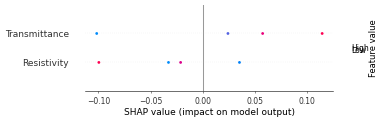

In [21]:
shap.summary_plot(shap_values,max_display=50)

In [22]:
# 依赖图
shap.plots.scatter(shap_values[:,"Transmittance"],color=shap_values[:,"Transmittance"], show = False)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# 依赖图
shap.plots.scatter(shap_values[:,"Resistivity"],color=shap_values[:,"Resistivity"], show = False)

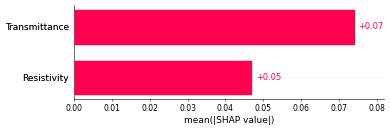

In [23]:
# [宏观]特征重要性SHAP值
shap.plots.bar(shap_values,max_display=50)

In [24]:
### RF-SHAP
import shap
shap.initjs()
explainer = shap.Explainer(model_RF)
shap_values = explainer(xx)

In [25]:
#force plot
shap.plots.force(shap_values[0])

In [26]:
# force plot
shap.plots.force(shap_values[1])

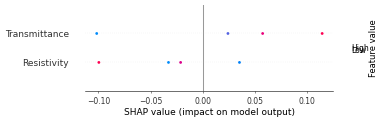

In [27]:
shap.summary_plot(shap_values,max_display=50)

In [28]:
# 依赖图
shap.plots.scatter(shap_values[:,"Transmittance"],color=shap_values[:,"Transmittance"], show = False)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# 依赖图
shap.plots.scatter(shap_values[:,"Resistivity"],color=shap_values[:,"Resistivity"], show = False)

In [ ]:
# [宏观]特征重要性SHAP值
shap.plots.bar(shap_values,max_display=50)